# Integrated Project 1 for tripleten

Introduction: This project attempts to take data collected about video game systems. It is my goal to transform the data and present it in a visually understandable manner, allowing us to draw conclusions based on the requirements outline by the project's instructions.

In [81]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [82]:
df = pd.read_csv("/datasets/games.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


printed dataframe

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


checking data types and getting a look at which columns contain missing values. I know I will need to convert columns "year_of_release", "critic_score", and "user_score" based off first glace, but I will do more analysis of this in part two.

In [84]:
df.columns = df.columns.str.lower()

Converted all columns to lower case as instructed

In [85]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


printed info again to view data types. I will deal with missing values before converting datatypes. "name", "year_of_release", "genre", "critic_score", "user_score", and "rating" all contain missing values, but to varying degrees. For example, "name" only contains 2 missing rows while "critic_score" contains 8576 missing values, therefore these columns need to be dealt with differently. I can delete rows where column info is missing twice because it would not greatly impact the DF, however I cannot do the same when over half the values are missing.

I can see how many values are missing from each column by subtracting "non-null" value from 16715 or calling df[column name].isna().sum()

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [87]:
df['name'].isna().sum()

2

In [88]:
df = df.dropna(subset=['name'])

dropping rows where "name" is missing since there is only 2.

In [89]:
df = df.dropna(subset=['genre'])

dropping rows where "genre" is missing since there is only 2.

In [90]:
df['year_of_release'].isna().sum()

269

There were 269 missing values in the "year_of_release" column. Possible reasons include that year of release was neglected when researching certain games or year was unknown. I decided to fill in missing values with 0. Removing missing values will allow me to convert data types and perform mathematical functions in future steps. If needed, I will omit years where "year_of_release" = 0 when doing further analysis.

In [91]:
df['year_of_release'] = df['year_of_release'].fillna(0)

In [92]:
df['year_of_release'].isna().sum()

0

In [93]:
df['critic_score'].isna().sum()

8576

There are many reasons values here could be missing. For example, maybe the game wasn't popular enough to be reviewed, it is too newly released to have been reviewed yet, or there was no ratings found for whatever reason. 


The same game can exist on multiple different platforms. Seeing as there are a lot of missing critic scores, I will group by name, take the average critic score for each name and fill in missing critic scores according to their scores on other platforms.

In [94]:
def fill_with_avg(group):
    return group.fillna(group.mean())
                        
df['critic_score'] = df.groupby('name')['critic_score'].transform(fill_with_avg)

In [95]:
df['critic_score'].isna().sum()

7615

Still left with 7615 missing values after filling in "critic_score" with known scores from other platforms.

In [96]:
df['critic_score'] = df['critic_score'].fillna(0)

In [97]:
df['critic_score'].isna().sum()

0

Decided to fill in remaining missing values with 0. This will allow me to convert data type and perfome mathematical operations later on if needed. If so, I will omit critic scores = 0 because this would skew results/analysis.

In [98]:
df['user_score'].isna().sum()

6699

In [99]:
df[df['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,42.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,0.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,0.0,tbd,E


There are quite a few missing values in this row which can be explained by similar reasons as previously discussed columns. (too new of a game to have been reviewed, not very popular of a game therefore it lacks reviews, couldn't find data, or just did not include data for whatever reason). There are also 2424 rows in which "tbd" occurs in the "user_score" column. Once again, this is probably because the game is too new/their arent't enough user reviews yet to include a score/data. In other words, "tbd" is also indicative of missing data.

I will be changing all "tbd" and null values to 0. 

In [100]:
df['user_score'] = df['user_score'].replace('tbd', 0)

In [101]:
df['user_score'] = df['user_score'].fillna(0)

In [102]:
df['user_score'].isna().sum()

0

Took care of missing/"tbd" values by using placeholder 0 so that I am able to convert datatypes and perform mathematical functions when needed. I will omit rows where user_score = 0 when analyzing user score data seeing as I added this information and is therefore not accurate for analysis.

In [103]:
df['rating'].isna().sum()

6764

Missing values can be explained by lack of information available on the game, the fact that it may be too new to have been rated yet, or it is possible that whoever gathered data neglected this particular game. 

In [104]:
df['rating'] = df['rating'].fillna(0)

In [105]:
df['rating'].isna().sum()

0

took care of missing values by replacing them with 0 in order to avoid confusion later on. It also allows us to do exploratory analysis on this data without interference of Nan values.

In [106]:
df.info()
df.sample(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4997,Bratz: Rock Angelz,PS2,2005.0,Misc,0.19,0.15,0.00,0.05,60.000000,5.1,E
12361,Cel Damage,GC,2002.0,Racing,0.05,0.01,0.00,0.00,67.000000,6.8,T
10673,Over the Hedge,XB,2006.0,Platform,0.07,0.02,0.00,0.00,61.000000,0,E10+
3876,LEGO Marvel Super Heroes,PSV,2013.0,Action,0.11,0.29,0.00,0.11,77.666667,0,0
7309,Nintendo Presents: Crossword Collection,DS,2009.0,Puzzle,0.00,0.19,0.00,0.02,0.000000,0,0
315,Tekken 5,PS2,2005.0,Fighting,0.93,1.94,0.31,0.70,88.000000,8.6,T
13128,Downtown no Gaki no Tsukai Yaarahen de!! Zetta...,3DS,2015.0,Action,0.00,0.00,0.05,0.00,0.000000,0,0
9731,Major League Baseball 2K8 Fantasy All-Stars,DS,2008.0,Sports,0.11,0.00,0.00,0.01,59.000000,7,E
15805,Pirates: Legend of the Black Buccaneer,PS2,2006.0,Adventure,0.01,0.01,0.00,0.00,42.000000,7,T
4812,MLB 2006,PS2,2005.0,Sports,0.33,0.01,0.00,0.05,81.000000,9,E


printed info to ensure all missing data was taken care of.

printed a random sample of the data to get another look at it.

I will convert "year_of_release" to a integer type since years are represented in whole numbers. I will also convert "critic_score" to integer type since in both head() and the sample, all critic scores were whole numbers. I will convert "user_score" to float in case mathematics will need to be applied later.

In [107]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [108]:
df['critic_score'] = df['critic_score'].astype(int)

In [109]:
df['user_score'] = df['user_score'].astype(float)

converted to appropriate data types

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [111]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

added 'total_sales' column by adding all existing sales columns

In [112]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,0,0.01


In [113]:
df_filtered = df[df['year_of_release'] > 2013]
df_filtered.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,0,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0.0,0,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,0,7.98


In [114]:
ps3_df = df_filtered[df_filtered['platform']=='PS3']
ps3_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,0,0.0,0,5.27
255,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,80,4.8,M,4.36
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,82,4.5,E,4.28
552,FIFA 16,PS3,2015,Sports,0.41,1.84,0.05,0.40,82,3.2,E,2.70
1021,Watch Dogs,PS3,2014,Action,0.56,0.81,0.10,0.27,74,5.1,M,1.74


In [115]:
df = df.drop_duplicates()

In [116]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,0,0.01


In [117]:
df['platform'].duplicated()

0        False
1        False
2         True
3         True
4        False
         ...  
16710     True
16711     True
16712     True
16713     True
16714     True
Name: platform, Length: 16713, dtype: bool

We have visualized the data, added a total sales column and deleted duplicates. now we will proceed with the data grouping.

In [118]:
df['year_of_release'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16710     True
16711     True
16712     True
16713     True
16714     True
Name: year_of_release, Length: 16713, dtype: bool

In [119]:
df['name'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16710     True
16711    False
16712    False
16713     True
16714     True
Name: name, Length: 16713, dtype: bool

In [120]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,0,0.01


In [121]:
ps3_df_no_duplicates = ps3_df.drop_duplicates(subset=['name', 'year_of_release', 'platform'])
ps3_df_no_duplicates.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,0,0.0,0,5.27
255,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,80,4.8,M,4.36
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,82,4.5,E,4.28
552,FIFA 16,PS3,2015,Sports,0.41,1.84,0.05,0.40,82,3.2,E,2.70
1021,Watch Dogs,PS3,2014,Action,0.56,0.81,0.10,0.27,74,5.1,M,1.74


#### Look at how many games were released in different years. Is the data for every period significant?

In [122]:
df_grouped_year = df.groupby('year_of_release')

In [123]:
df_grouped = df_grouped_year['year_of_release'].value_counts()
df_grouped

year_of_release  year_of_release
0                0                   269
1980             1980                  9
1981             1981                 46
1982             1982                 36
1983             1983                 17
1984             1984                 14
1985             1985                 14
1986             1986                 21
1987             1987                 16
1988             1988                 15
1989             1989                 17
1990             1990                 16
1991             1991                 41
1992             1992                 43
1993             1993                 60
1994             1994                121
1995             1995                219
1996             1996                263
1997             1997                289
1998             1998                379
1999             1999                338
2000             2000                350
2001             2001                482
2002             2002   

using "value_counts" we can see how many times each year occurs in the dataset. I will exclude 0 from my analysis since I replaced all Nan values with 0. Here we can see that the first year data was collected 1980, very few games were released. The amount of games released never exceeds 50 in a year until 1993, when 60 games were released, and then the amount more than doubles for the following year. This could be because of rising popularity in video games. Number of games released per year continues to increase each year until 2002. There is not a major difference in the number released per year from years 2002 to 2004. There is a rise in games released from 2005 until 2009, and from there it decreases. There is a substantial drop in year 2012, and it continues to steadily decline.

Although there is a large pool of yearly sales/games released to analyze, my main focus is planning the 2017 campaign. Therefore, sales from 1980 - 2011 are not very relevant for my analysis. Video games and their users' behaviors/useage of video games are constantly changing, therefore I consider data from the last 5 years to be more signicant when planning the marketing campaign.

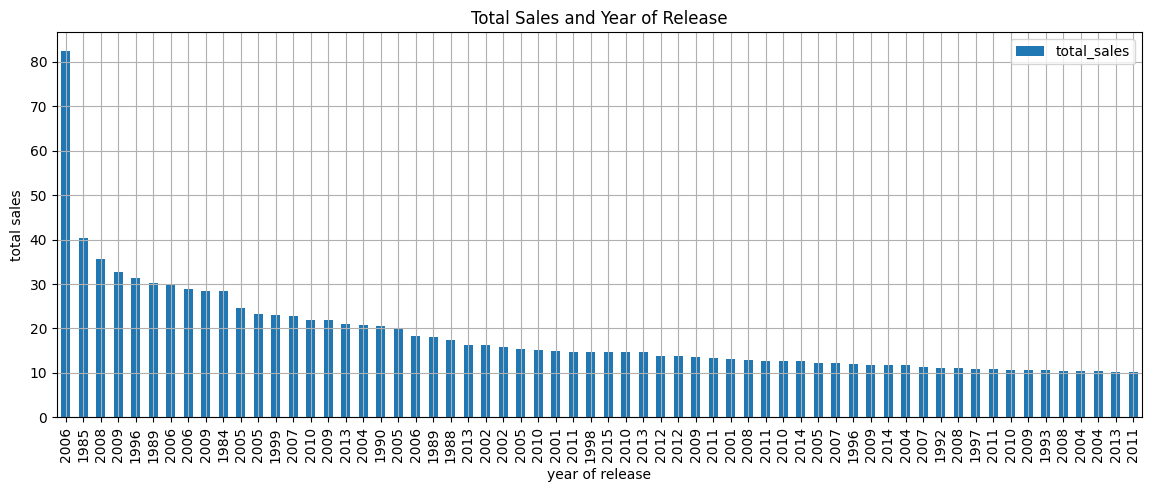

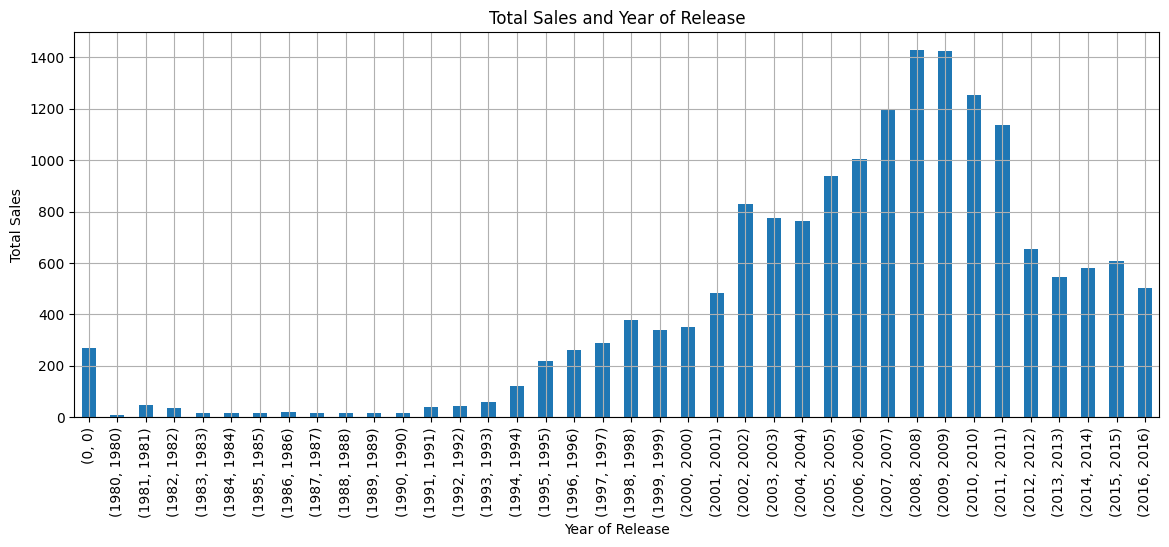

In [124]:
filtered_df = df[df['total_sales'] > 10]
filtered_df.plot(kind='bar', x='year_of_release', y='total_sales', xlabel='year of release', 
        ylabel='total sales', grid=True, figsize=(14,5))
filtered_df = filtered_df.sort_values(by='year_of_release')
plt.title('Total Sales and Year of Release')
plt.show()

df_grouped.plot(
    kind='bar',
    x='year_of_release',
    y='total_sales',
    xlabel='Year of Release',
    ylabel='Total Sales',
    grid=True,
    figsize=(14, 5))

plt.title('Total Sales and Year of Release')
plt.show()

We conclude that between 2005 and 2010 showed the most promising sales.

#### Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

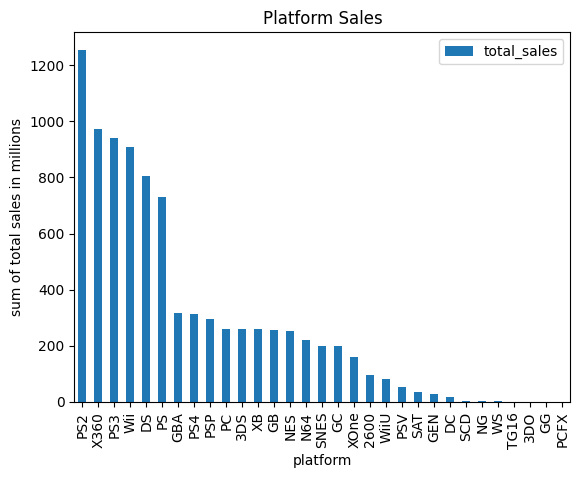

In [125]:
platform_sales = (df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                  .sort_values('total_sales', ascending=False))
platform_sales.plot(kind='bar', ylabel='sum of total sales in millions', xlabel='platform', title='Platform Sales')
plt.show()

Created a bar graph showing total sales for each platform in the dataset. Sorted the graph in descending order since the focus is on platforms with greatest total sales. Here, I will chose the top 6: PS2, X360, PS3, Wii, DS, and PS. All 6 of these platform have a sum of total sales of around 750 million dollars or more. After these 6, sum of total sales drops drastically to around 375 million dollars or less.

PS2


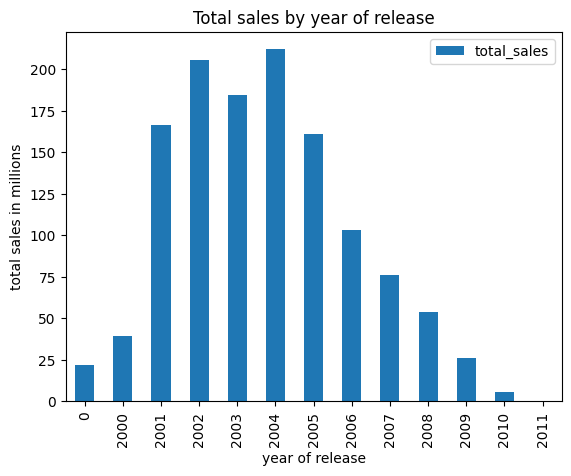

X360


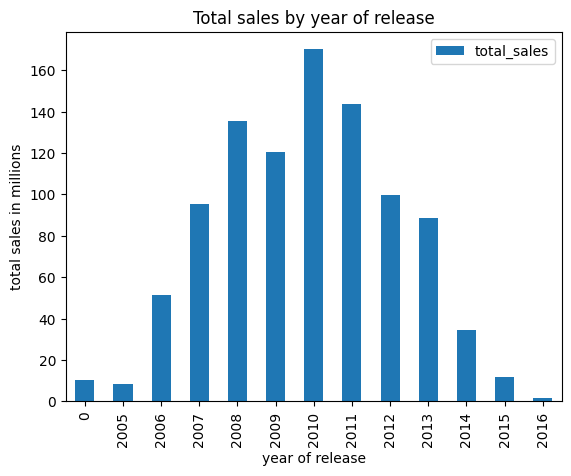

PS3


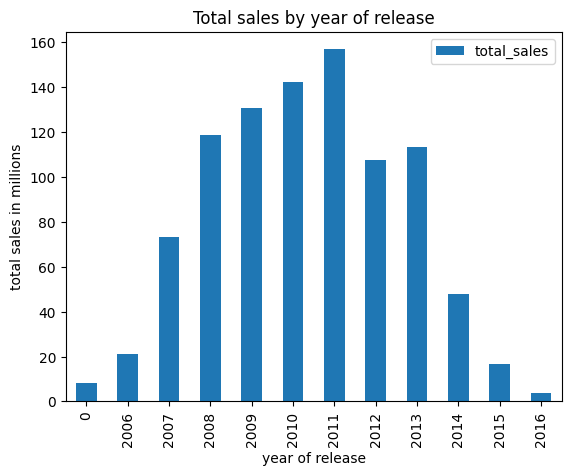

Wii


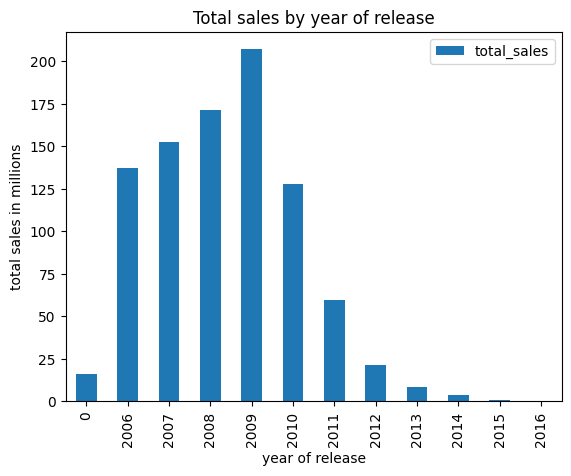

DS


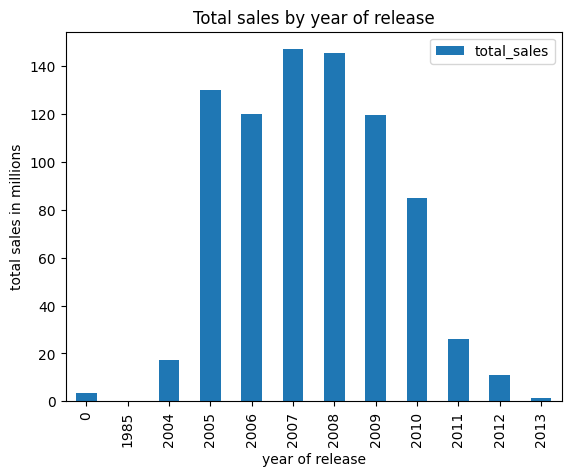

PS


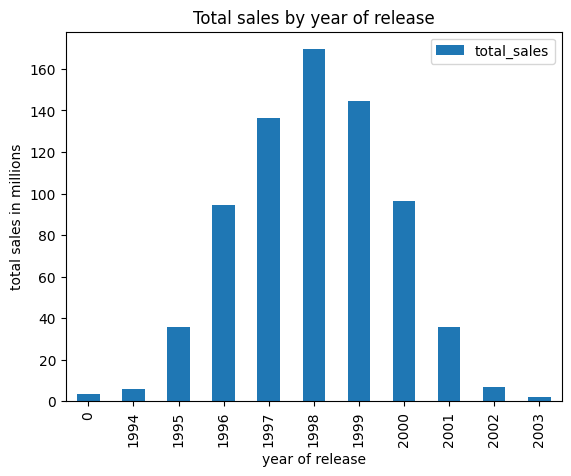

In [126]:
for platform in platform_sales.index[:6]:
    print(platform)
    (df.query('platform == @platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', xlabel='year of release', ylabel='total sales in millions', title='Total sales by year of release'))
    plt.show()

Created a for loop to generate graphs for the 6 highest-grossing platforms, comparing total sales by year. For all graphs, disregard year 0 as it is a placeholder for missing year information. Here, I will be equating total sales to popularity of the platform.

The platform with the highest total sales in PS2. PS2 started to gain popularity in 2000 with a significant jump in sales from year 2000 to 2001. Sales remain fairly steady and high until 2005 where sales start to decline, but still remain fairly high. In 2011, there were close to 0 sales. To conclude, PS2 retained popularity and high sales from 2000/2001 until it reached 0 in 2011 (~10 years).

X360 retained high sales from about 2006 to 2014 and then reached nearly 0 dollars in sales in 2016. Similar to PS2, X360's lifespan starting from rising popularity to nearly 0 sales lasted about 10 years.

PS3 retained high sales from about 2006 with increasing sales until 2011. After this, sales declined. By 2016, sales were nearly 0. This follows the 10-year lifespan pattern from PS2 and X360.

Wii retained high and increasing sales from 2006 until 2009 and then sales started to decline. Sales are very low in 2013, 2014, and 2015, and sales are nearly 0 in 2016, once again following the 10-year lifespan pattern.

DS, though released in 1985, did not retain high sales until 2005-2010 and then sales consequently decline. By 2013 sales are nearly 0. DS had about an 8 year lifespan from the time it appeared as a popular platform unitl reaching 0 sales.

PS started showing relevant sales in 1995, 10 years after being released. Sales increase until their peak in 1998 and retain fairly high sales until 2000. By 2003, sales are close to 0. Similar to DS, PS had about an 8 year lifespan from the time it appeared as a popular platform unitl reaching 0 sales.

To conclude, platforms tend to die off after about 10 years of steady high sales.


#### Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a model for 2017.

Based on previous review of the data and considering that my goal is to forecast sales/come up with a marketing strategy for 2017, I will only be using data from the past 2 years (2014-2016). Data from years prior to this timeframe are irrelevant for the task at hand seeing as trends in gaming are constantly changing. For exmaple, the sales of a platform in 1980 can't predict much regarding sales of a currently popular platform. Although the average lifespan of a platform from the time it gains popularity/generates high sales is about 8-10 years, even going back that far would be irrelevant for this analysis due to changing trends. We can see above that several platforms that were once very popular and had high sales lost popularity in 2016, so going back more than 2 years could skew data when looking at what platforms are currently popular/generate high sales. Data from years 2014-2016 is manageable and relevant in predicting future sales and leading marketing strategies.

#### Work only with the data that you've decided is relevant. Disregard the data for previous years.

After deciding to only work with data from 2014-2016, I will filter the DF so that I have a new DF including only platforms/games from the time period relevant for analysis.

In [127]:
df_filtered = df[df['year_of_release'] > 2013]
df_filtered.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,0,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0.0,0,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,0,7.98


Successfully filitered DF to show games released after 2013. All data analyzed from this point onward will be regarding the time frame 2014-2016.

#### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

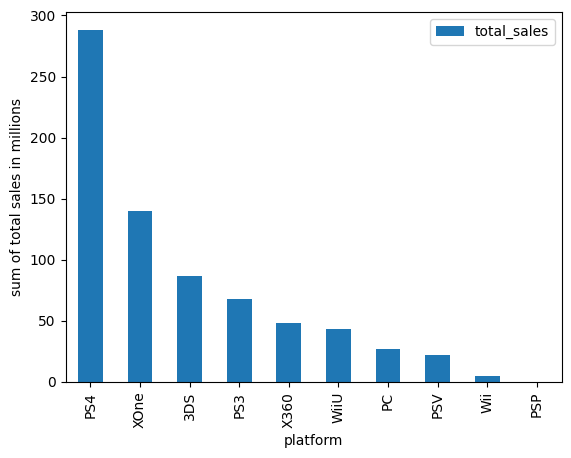

In [128]:
filtered_platform_sales = (df_filtered.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                  .sort_values('total_sales', ascending=False))
filtered_platform_sales.plot(kind='bar', ylabel='sum of total sales in millions', xlabel='platform')
plt.show()

Created a graph comparing platforms and the sum of their total sales.

PS4 leads in sales, almost doubling the platform with the next highest sales, XOne. 

There are only 10 platforms with games released from 2014-2016 in the dataset. The 6 platforms with the highest sales are PS4, XOne, 3DS, PS3, X360, and WiiU.

PS4


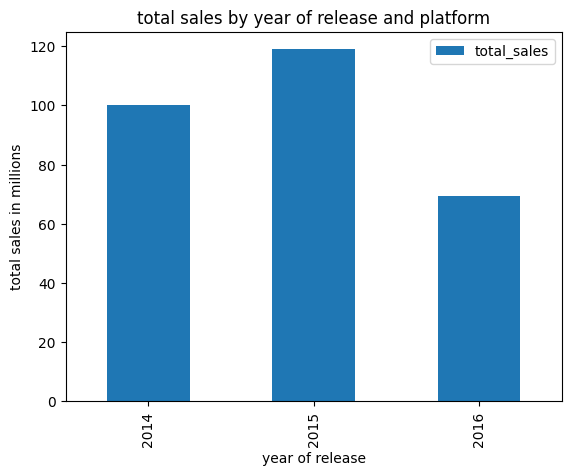

XOne


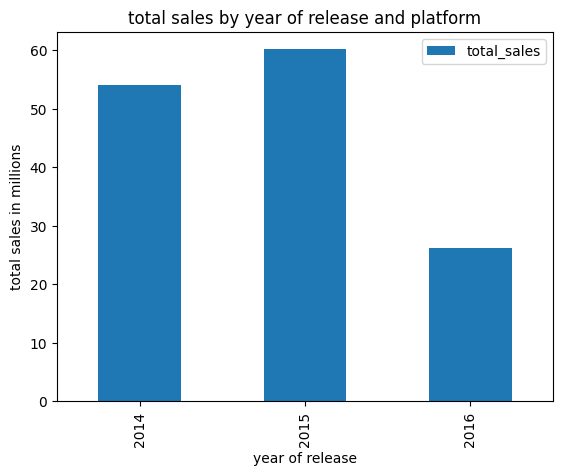

3DS


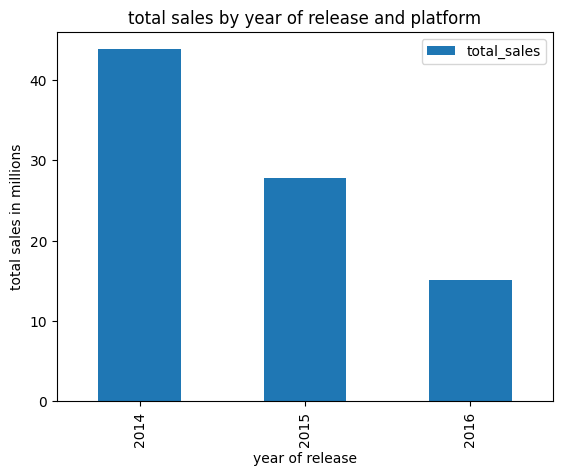

PS3


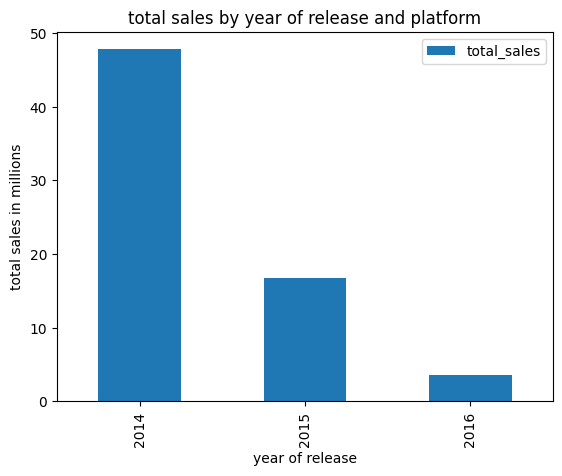

X360


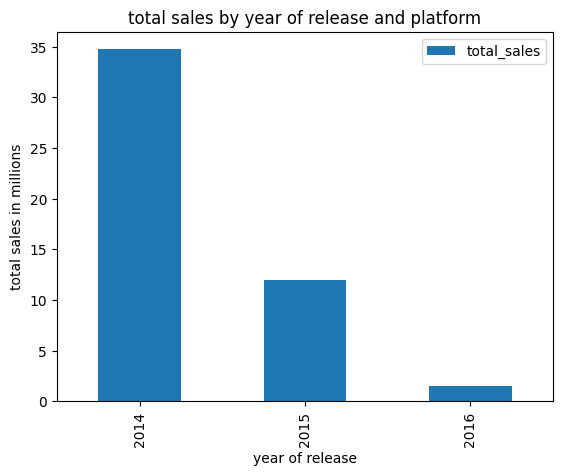

WiiU


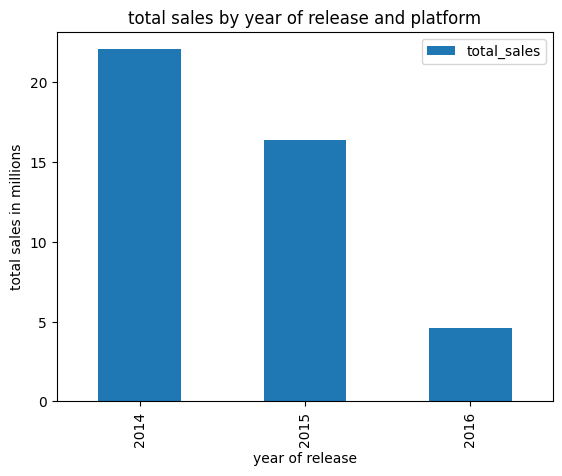

PC


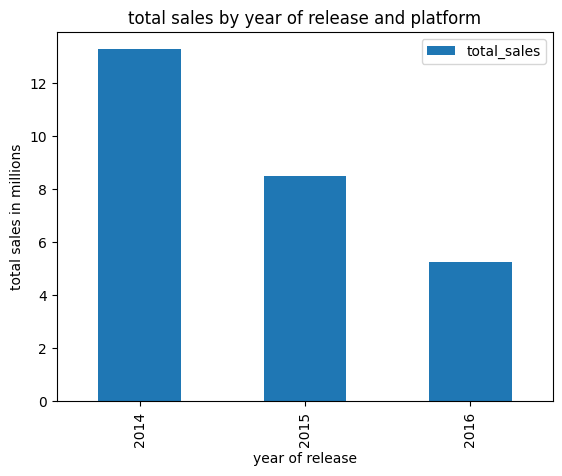

PSV


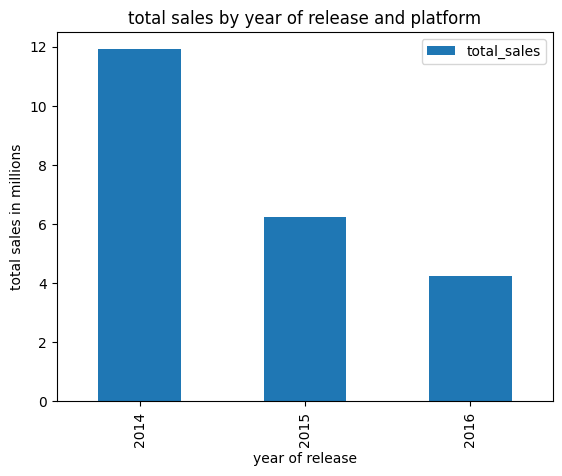

Wii


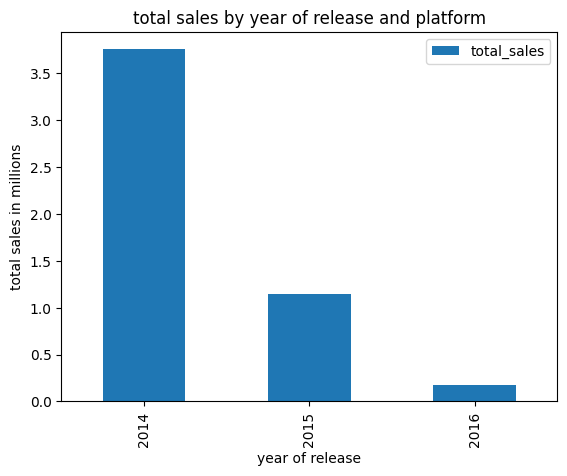

PSP


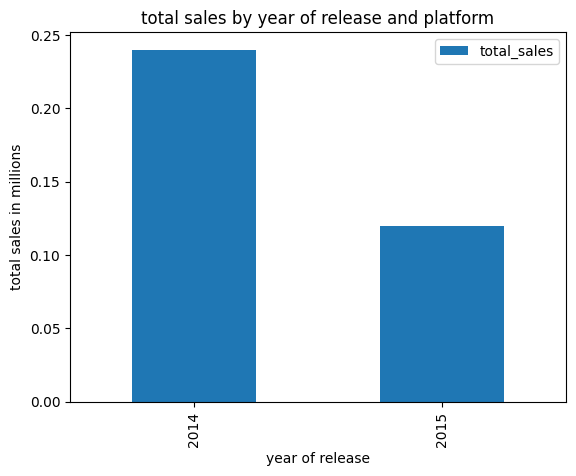

In [129]:
for platform in filtered_platform_sales.index:
    print(platform)
    (df_filtered.query('platform == @platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', xlabel='year of release', ylabel='total sales in millions', title='total sales by year of release and platform'))
    plt.show()

When analyzing what platforms are growing/shrinking from years 2014-2016, it appears all platforms saw a decrease in sales from 2015 to 2016 and PSP either became obsolete in 2016 or there is no available info regarding 2016 sales. 

However when comparing graphs representing all years in the dataframe to graphs representing sales in just 2014-2016, there is a difference in which platforms had the highest sales then vs. now. For example, PS4, XOne, and 3DS are now the top 3 highest-grossing platforms, all of which were not in the top highest-grossing platforms when looking at all available years. This could represent growth in popularity/sales and potential for profitability even though sales dipped from 2015-2016.

Taking all of this into consideration, I can conclude that platforms with potential to be profitable are PS4, XOne, and 3DS. They all retained sales above ~15 million dollars in 2016 while other platforms did not.

In [130]:
# Reviewer's code 9

df_filtered.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


#### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

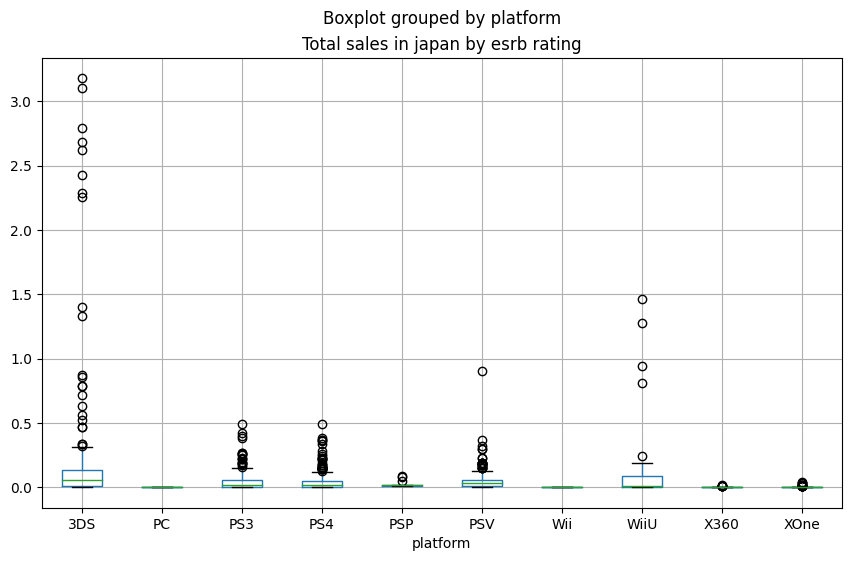

In [131]:
df_filtered.boxplot(column='jp_sales', by='platform', grid=True, figsize=(10,6))
plt.title('Total sales in japan by esrb rating')
plt.ylim()
plt.xlim()
plt.show()

We have determined that sales in japan are partially correlated with rating, and should market accordingly. The outliers tell us that extremes exist and normalization should be considered to remove these and give us a clearer distribution, but that is beyond the scope of this project.

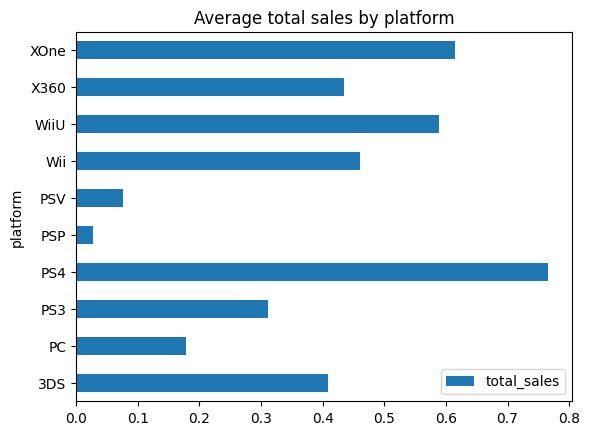

In [132]:
df_filtered.pivot_table(index='platform', values='total_sales', aggfunc='mean').plot(kind='barh', 
                                        title='Average total sales by platform', ylabel='mean')
plt.show()

#### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [133]:
ps4_df = df_filtered[df_filtered['platform']=='PS4']
ps4_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,0,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,0,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66


filtered DF to show only rows where platform is PS4

<AxesSubplot:title={'center':'Correlation of user score and total sales for PS4'}, xlabel='total sales', ylabel='user score'>

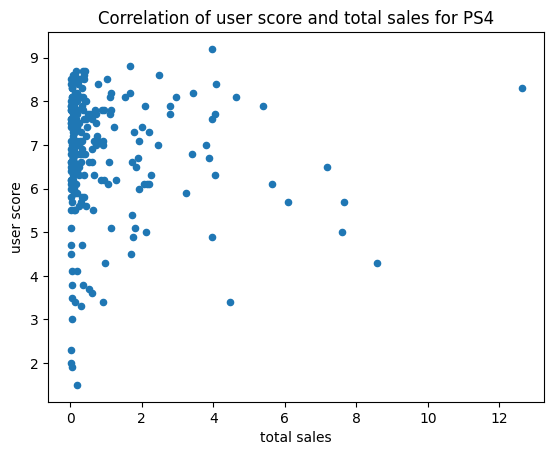

In [134]:
filtered_ps4_df = ps4_df[(ps4_df['total_sales'] > 0) & (ps4_df['user_score'] > 0)]
filtered_ps4_df.plot(kind='scatter', x='total_sales', y='user_score', xlabel='total sales', 
            ylabel='user score', title='Correlation of user score and total sales for PS4')

Scatter plot showing correlation between user score shows a high concentration of ps4 games with low sales but hgih user scores of around 5.5 to 9. There is also a high concentration with low sales and user scores of 0, this could potentially be due to the fact that Nan values were filled with 0 in order to convert data types and accurately analyze data and therefore these points are irrelevant.

In [135]:
filtered_ps4_df['user_score'].corr(df['total_sales'])

-0.040131589472697356

correlation coefficient indicates an inverse correlation between user scores and total sales, and should market accordingly.

<AxesSubplot:title={'center':'Correlation of critic score and total sales for PS4'}, xlabel='total sales', ylabel='critic score'>

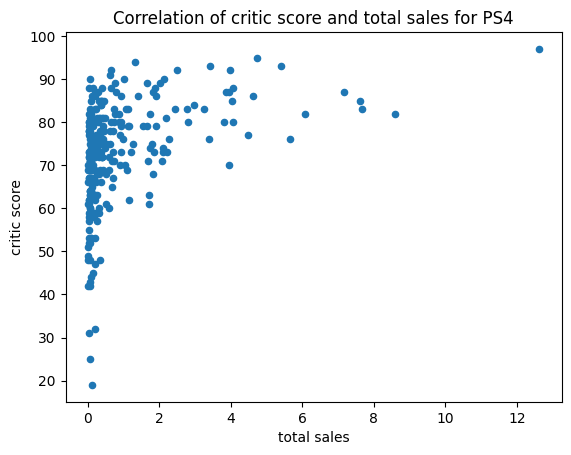

In [136]:
filtered_ps4_df = ps4_df[(ps4_df['total_sales'] > 0) & (ps4_df['critic_score'] > 0)]
filtered_ps4_df.plot(kind='scatter', x='total_sales', y='critic_score', xlabel='total sales', ylabel='critic score', title='Correlation of critic score and total sales for PS4')


In [137]:
filtered_ps4_df['critic_score'].corr(df['total_sales'])

0.389220559379558

Scatter plot showing correlation between critic score shows a high concentration of ps4 games with low sales but medium to high critic scores of around 50 to 90. On average, critic scores were above 40 but for these scores, total sales for these games ranged anywhere from 0 to 12.5 million dollars. 

There is also a high concentration with low sales and critic scores of 0, this could potentially be due to the fact that Nan values were filled with 0 in order to convert data types and accurately analyze data and therefore these points are irrelevant.

correlation coefficient indicates little to linear correlation between critic score and total sales.

#### Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [138]:
ps3_df = df_filtered[df_filtered['platform']=='PS3']
ps3_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,0,0.0,0,5.27
255,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,80,4.8,M,4.36
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,82,4.5,E,4.28
552,FIFA 16,PS3,2015,Sports,0.41,1.84,0.05,0.40,82,3.2,E,2.70
1021,Watch Dogs,PS3,2014,Action,0.56,0.81,0.10,0.27,74,5.1,M,1.74


In [139]:
other_platforms = df_filtered[df_filtered['platform'] != 'PS4']

In [140]:
same_games = ps4_df[ps4_df['name'].isin(other_platforms.index)]

In [141]:
ps4 = df_filtered[df_filtered['platform']=='PS4']['name'].unique()

In [142]:
non_ps4= df_filtered[df_filtered['platform'] != 'PS4']['name'].unique()

In [143]:
xbox_one_df = df_filtered[df_filtered['platform']=='XOne']
xbox_one_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0,0.0,0,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22


In [144]:
ps4_df = df_filtered[df_filtered['platform']=='PS4']
ps4_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,0,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,0,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66


In [145]:
other_platforms2 = df_filtered[df_filtered['platform'] != 'PS4']

In [146]:
common_games = np.intersect1d(ps4, non_ps4)

In [147]:
common_games = df_filtered[df_filtered['name'].isin(common_games)]

In [148]:
ps3_df['user_score'].replace(0, np.nan, inplace=True)
ps3_df_filtered = ps3_df.dropna(subset=['user_score'])
ps3_df_filtered = ps3_df_filtered[(ps3_df_filtered['total_sales'] > 0)]


/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [149]:
ps3_df['critic_score'].replace(0, np.nan, inplace=True)
ps3_df_filtered = ps3_df.dropna(subset=['critic_score'])
ps3_df_filtered = ps3_df_filtered[(ps3_df_filtered['total_sales'] > 0)]

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


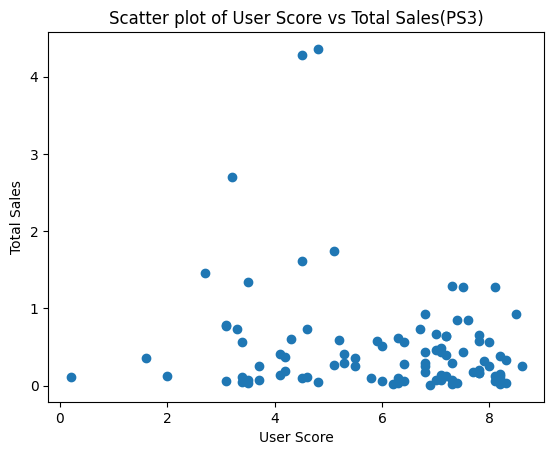

In [150]:
plt.scatter(ps3_df_filtered['user_score'], ps3_df_filtered['total_sales'])
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.title('Scatter plot of User Score vs Total Sales(PS3)')
plt.show()

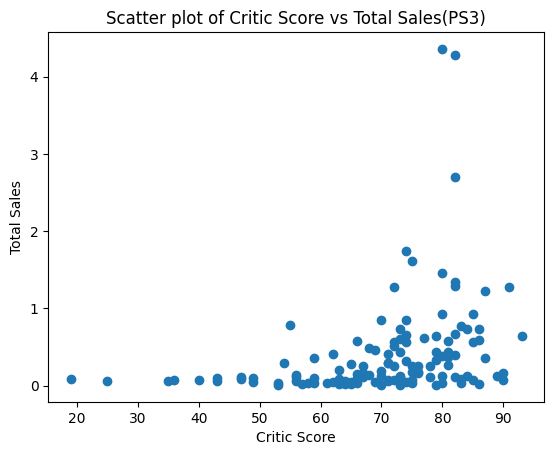

In [151]:
plt.scatter(ps3_df_filtered['critic_score'], ps3_df_filtered['total_sales'])
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.title('Scatter plot of Critic Score vs Total Sales(PS3)')
plt.show()

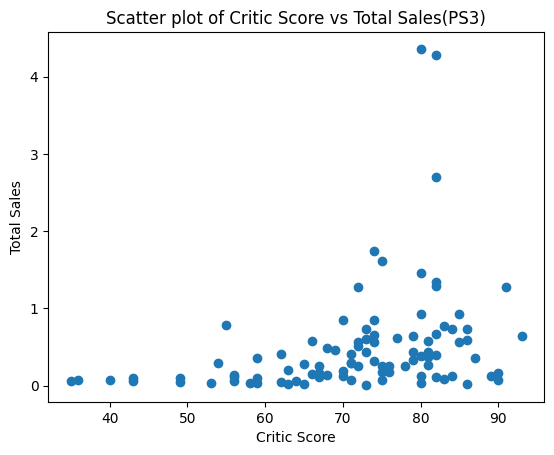

In [152]:
ps3_df_filtered = ps3_df[(ps3_df['total_sales'] > 0) & (ps3_df['user_score'] > 0)]
plt.scatter(ps3_df_filtered['critic_score'], ps3_df_filtered['total_sales'])
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.title('Scatter plot of Critic Score vs Total Sales(PS3)')
plt.show()

In [153]:
ps3_df_correlation = ps3_df_filtered['user_score'].corr(ps3_df_filtered['total_sales'])
ps3_df_correlation

-0.16676141347662118

The correlation shows a negative inverse number, and should be marketed appropriately. It means that they run opposite to each other. When the sales are high, the user score cascades lower, and when the sales are lower, the user scode cascades higher. 

In [154]:
ps3_df_correlation = ps3_df_filtered['critic_score'].corr(ps3_df_filtered['total_sales'])
ps3_df_correlation

0.3146817348950609

The correlation shows a weak relationship that is positive, indicating they are loosely correlated.

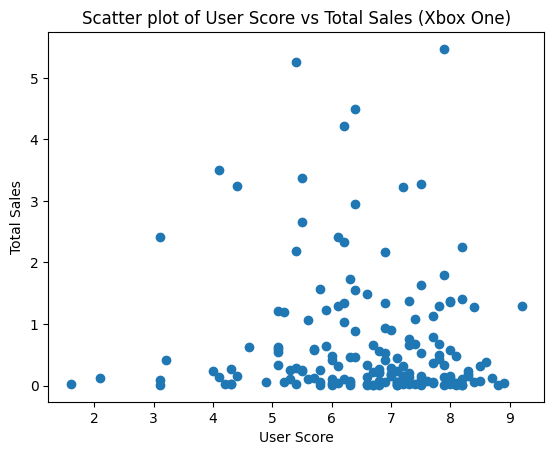

In [155]:
filtered_xbox_one_df = xbox_one_df[(xbox_one_df['total_sales'] > 0) & (xbox_one_df['user_score'] > 0)]
plt.scatter(filtered_xbox_one_df['user_score'], filtered_xbox_one_df['total_sales'])
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.title('Scatter plot of User Score vs Total Sales (Xbox One)')
plt.show()

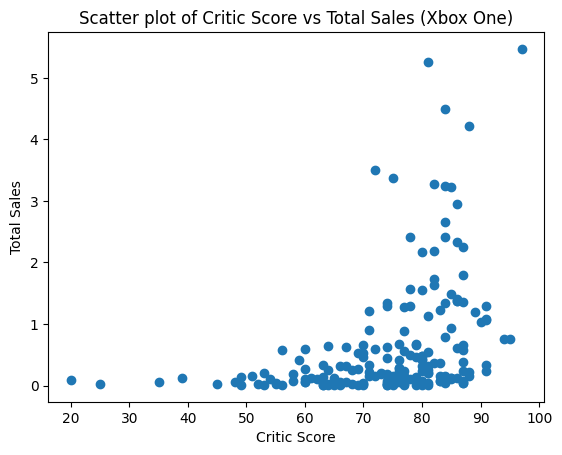

In [156]:
xbox_one_df_filtered = xbox_one_df[(xbox_one_df['total_sales'] > 0) & (xbox_one_df['critic_score'] > 0)]
plt.scatter(xbox_one_df_filtered['critic_score'], xbox_one_df_filtered['total_sales'])
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.title('Scatter plot of Critic Score vs Total Sales (Xbox One)')
plt.show()

In [157]:
xbox_one_df_filtered = xbox_one_df[xbox_one_df['user_score'] > 0]
xbox_one_correlation = xbox_one_df_filtered['user_score'].corr(xbox_one_df_filtered['total_sales'])
xbox_one_correlation

-0.0703839280647581

The correlation shows a negative inverse number, and should be marketed appropriately. It means that they run opposite to each other. When the sales are high, the user score cascades lower, and when the sales are lower, the user scode cascades higher. 

In [158]:
xbox_one_df_filtered = xbox_one_df[xbox_one_df['critic_score'] > 0]
xbox_one_correlation = xbox_one_df_filtered['critic_score'].corr(xbox_one_df_filtered['total_sales'])
xbox_one_correlation

0.38092682659091137

The correlation shows a positive value. This indicates a weak correlation between critic score and total sales.

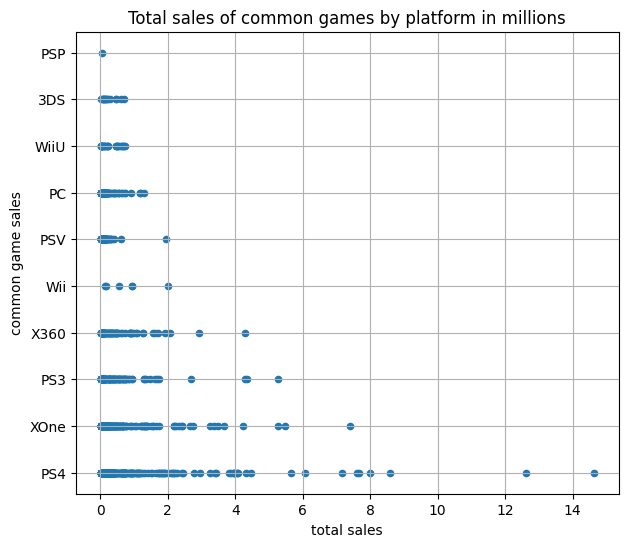

In [159]:
common_games.plot(kind='scatter', x='total_sales', y='platform', 
                 xlabel='total sales', ylabel='common game sales', 
                 grid=True, figsize=(7, 6))
plt.title('Total sales of common games by platform in millions')
plt.show()
 

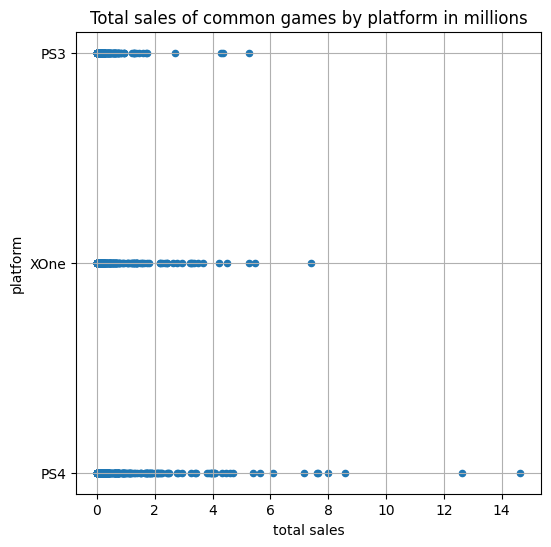

In [160]:
platforms = ['XOne', 'PS4', 'PS3']
common_ps4 = df_filtered[df_filtered['platform'].isin(platforms)]

common_ps4.plot(kind='scatter', x='total_sales', y='platform', 
                  xlabel='total sales', ylabel='platform', 
                  grid=True, figsize=(6, 6))

plt.title('Total sales of common games by platform in millions')
plt.show()

We can now observe the total sales of the three contrasting systems, PS4, XBox One and PS3 in millions. I would suggest marketing around the Xbox One and PS4, according to this data.

In [161]:
print(common_ps4)

                                                name platform  \
31                         Call of Duty: Black Ops 3      PS4   
42                                Grand Theft Auto V      PS4   
77                                           FIFA 16      PS4   
87                      Star Wars Battlefront (2015)      PS4   
92                    Call of Duty: Advanced Warfare      PS4   
...                                              ...      ...   
16660                               Prison Architect     XOne   
16672  Metal Gear Solid V: The Definitive Experience     XOne   
16674                  Tsukigime Ranko's Longest Day      PS3   
16691                   Dynasty Warriors: Eiketsuden      PS3   
16710                  Samurai Warriors: Sanada Maru      PS3   

       year_of_release    genre  na_sales  eu_sales  jp_sales  other_sales  \
31                2015  Shooter      6.03      5.86      0.36         2.38   
42                2014   Action      3.96      6.31      0.38  

In [162]:
print(common_ps4.head())
print(common_ps4.info())

                              name platform  year_of_release    genre  \
31       Call of Duty: Black Ops 3      PS4             2015  Shooter   
42              Grand Theft Auto V      PS4             2014   Action   
77                         FIFA 16      PS4             2015   Sports   
87    Star Wars Battlefront (2015)      PS4             2015  Shooter   
92  Call of Duty: Advanced Warfare      PS4             2014  Shooter   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
31      6.03      5.86      0.36         2.38             0         0.0   
42      3.96      6.31      0.38         1.97            97         8.3   
77      1.12      6.12      0.06         1.28            82         4.3   
87      2.99      3.49      0.22         1.28             0         0.0   
92      2.81      3.48      0.14         1.23            83         5.7   

   rating  total_sales  
31      0        14.63  
42      M        12.62  
77      E         8.58  
87      0 

#### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

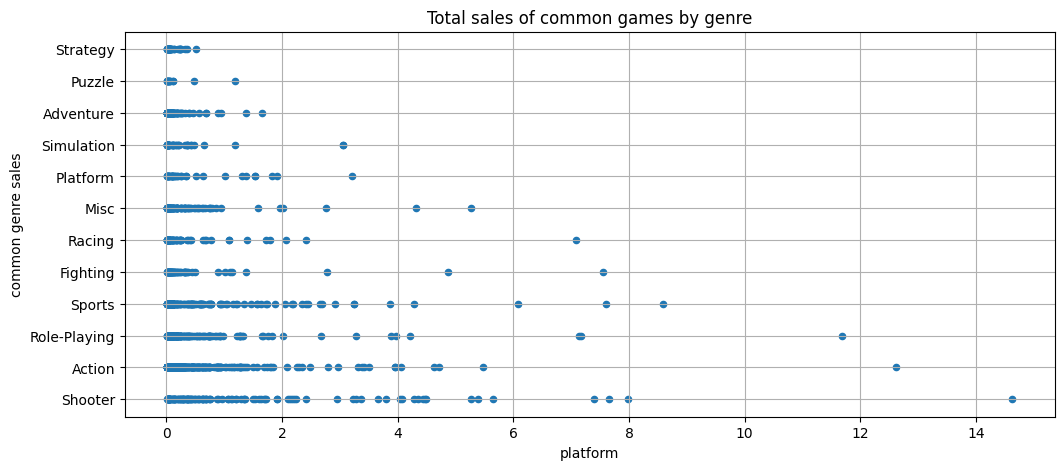

In [163]:
df_filtered.plot(kind='scatter', x='total_sales', y='genre', xlabel='platform', ylabel='common genre sales', grid=True, figsize=(12,5))
plt.title('Total sales of common games by genre')
plt.show()

The most profitable genres appear to be action, fighting, shooter, role-playing and sports. Marketing should focus around those.

### Step 4. Create a user profile for each region

#### For each region (NA, EU, JP), determine the top five platforms. Describe variations in their market shares from region to region.

PS4


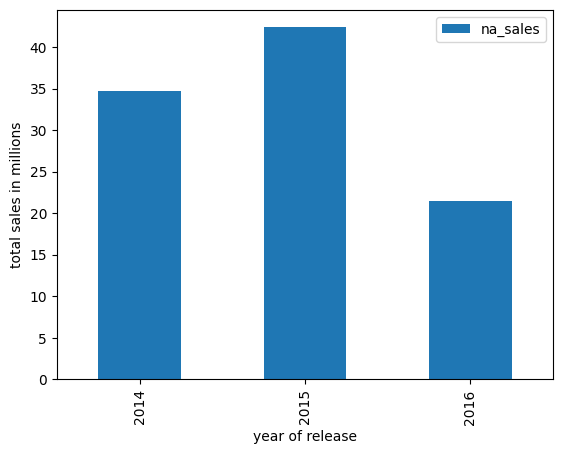

XOne


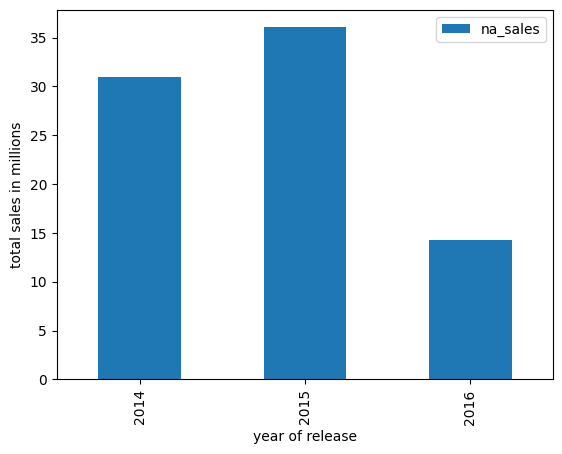

3DS


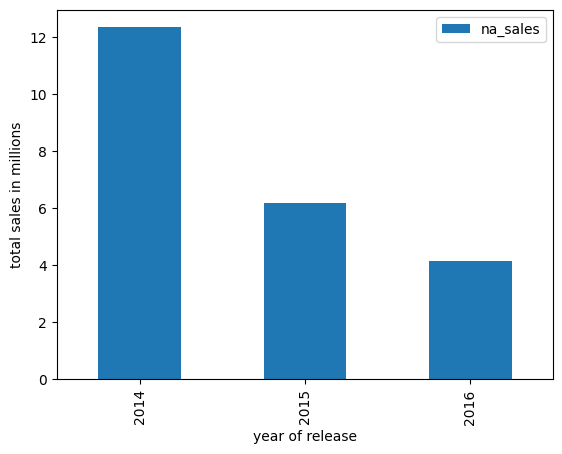

PS3


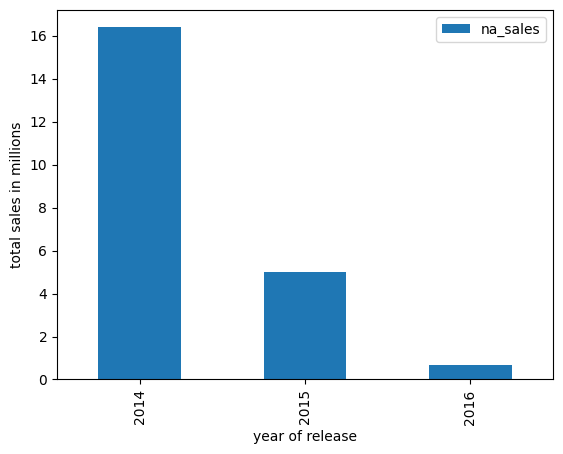

X360


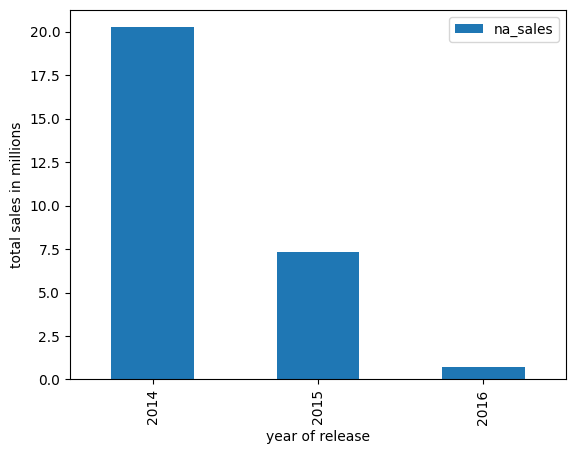

WiiU


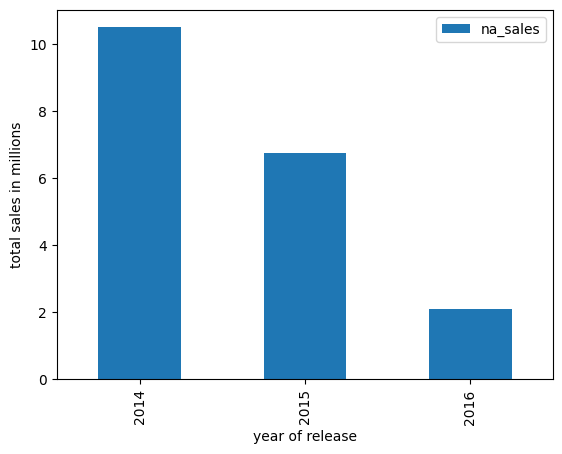

PC


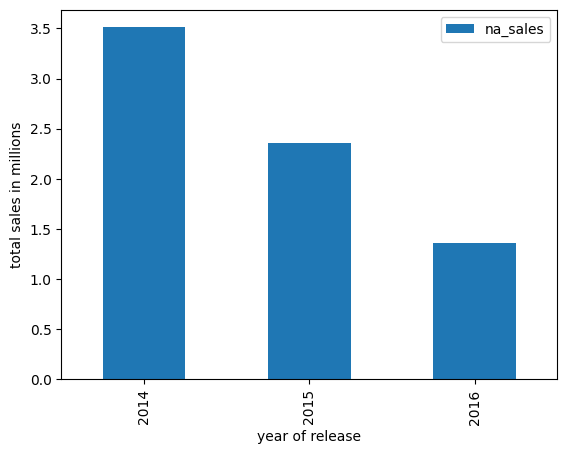

PSV


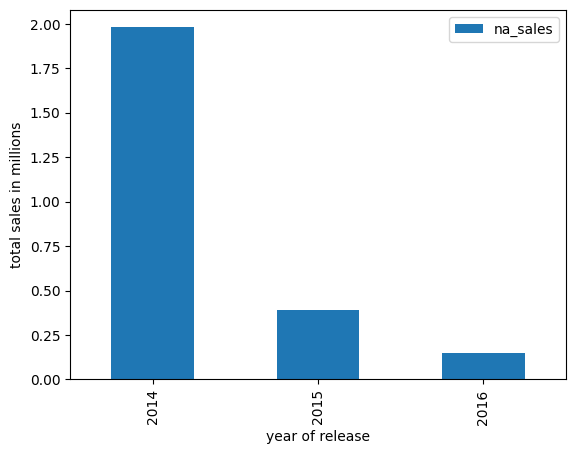

Wii


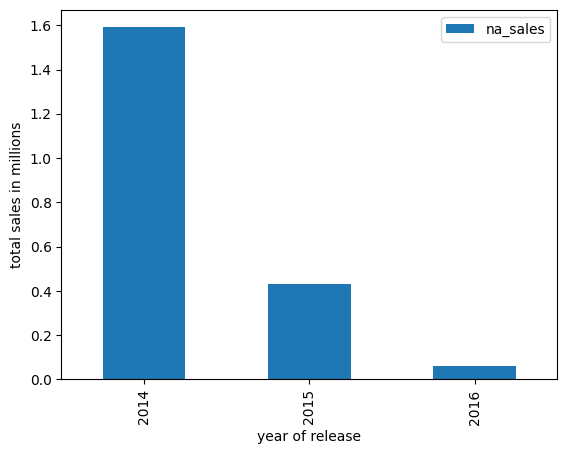

PSP


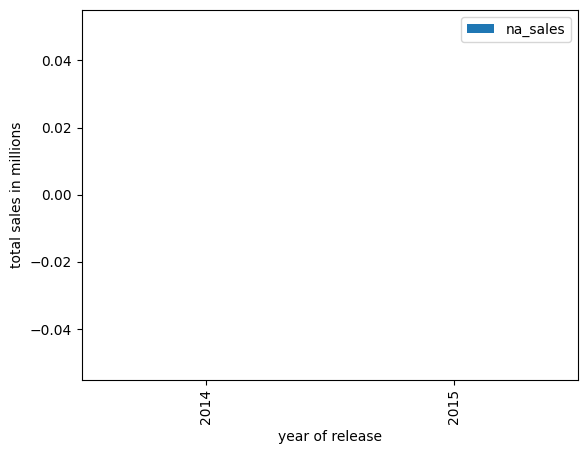

In [164]:
for platform in filtered_platform_sales.index:
    print(platform)
    (df_filtered.query('platform == @platform').pivot_table(index='year_of_release', values='na_sales', aggfunc='sum').plot(kind='bar', xlabel='year of release', ylabel='total sales in millions'))
    plt.show()

The PS4, PS3, XBOXONE, WiiU and XBOX360 were the most profitable in North America.

In [165]:
df_filtered.groupby('platform')['na_sales'].sum().sort_values().tail()

platform
PS3     22.05
3DS     22.64
X360    28.30
XOne    81.27
PS4     98.61
Name: na_sales, dtype: float64

In [166]:
df_mean = df_filtered.mean()
df_mean

year_of_release    2014.953227
na_sales              0.168182
eu_sales              0.160261
jp_sales              0.055115
other_sales           0.048324
critic_score         42.397276
user_score            3.482356
total_sales           0.431883
dtype: float64

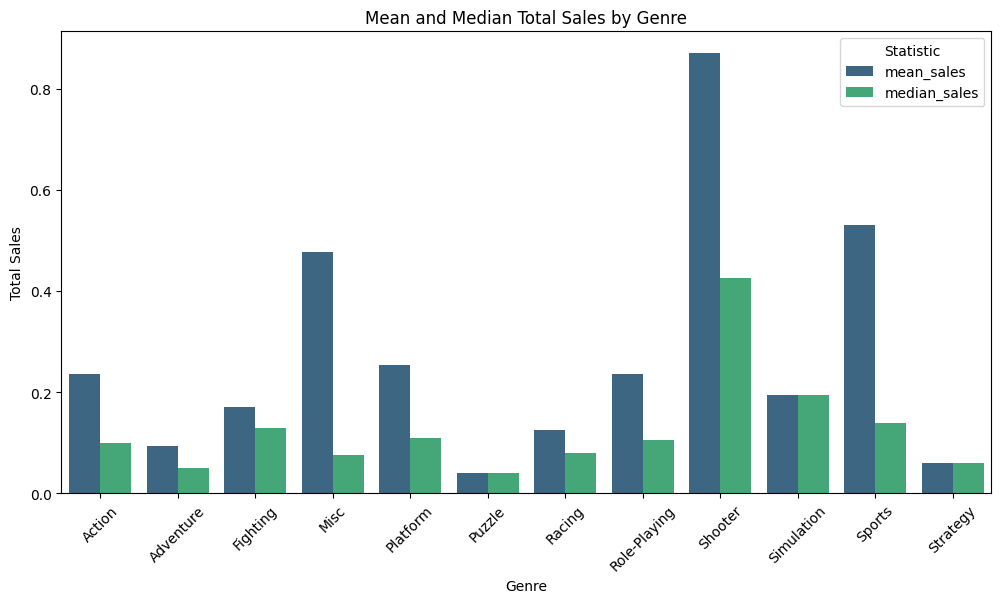

In [167]:
mean_sales = ps3_df.groupby('genre')['total_sales'].mean().reset_index(name='mean_sales')
median_sales = ps3_df.groupby('genre')['total_sales'].median().reset_index(name='median_sales')
sales_stats = pd.merge(mean_sales, median_sales, on='genre')
sales_melted = pd.melt(sales_stats, id_vars='genre', value_vars=['mean_sales', 'median_sales'], 
                       var_name='Statistic', value_name='Value')
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='Value', hue='Statistic', data=sales_melted, palette='viridis')
plt.title('Mean and Median Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Statistic')
plt.show()

The mean and median are displayed as shown. The main sales occured within the first 30% of the total sales. The median amount sold was 10%.

PS4


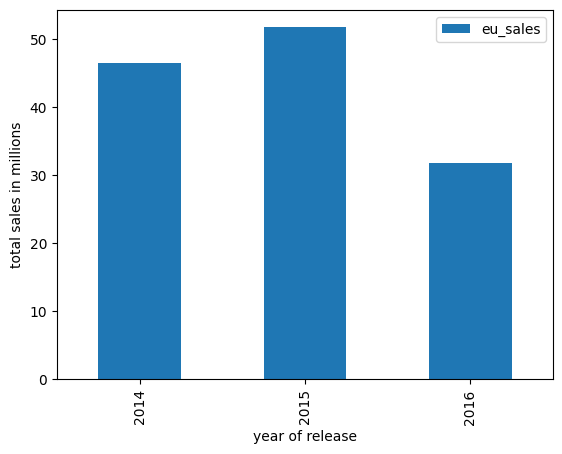

XOne


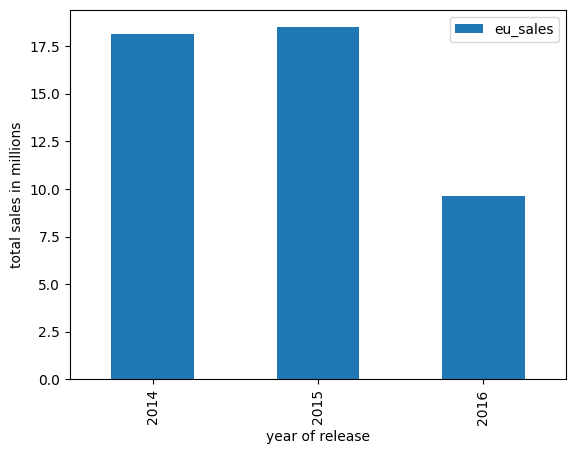

3DS


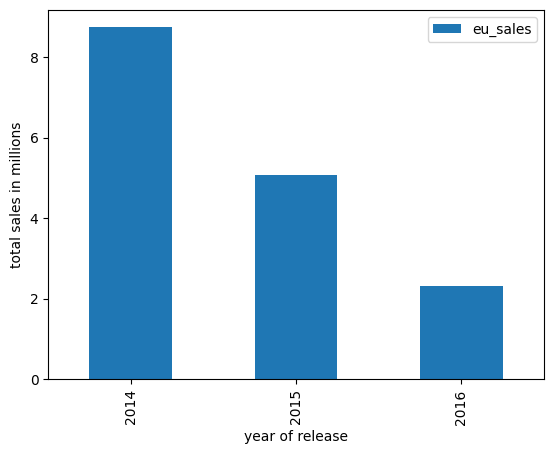

PS3


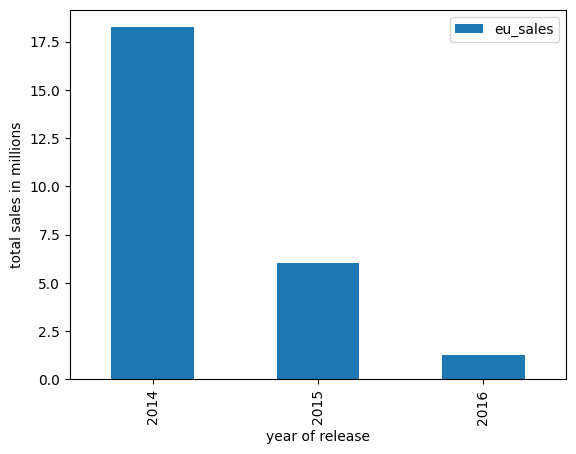

X360


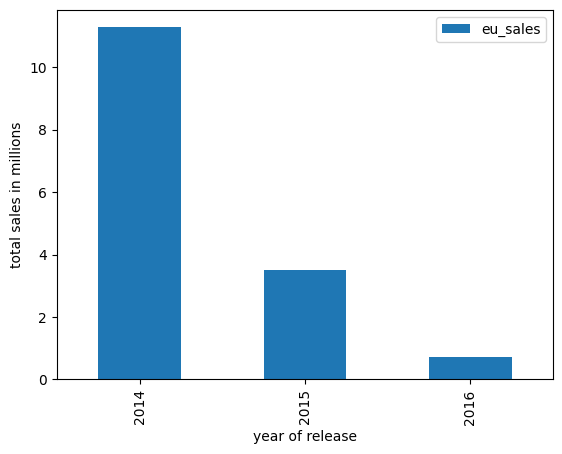

WiiU


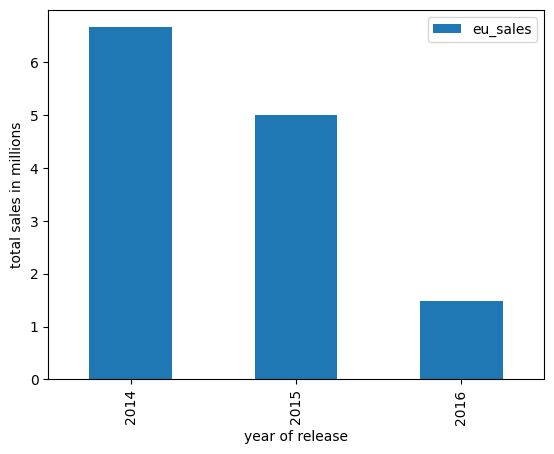

PC


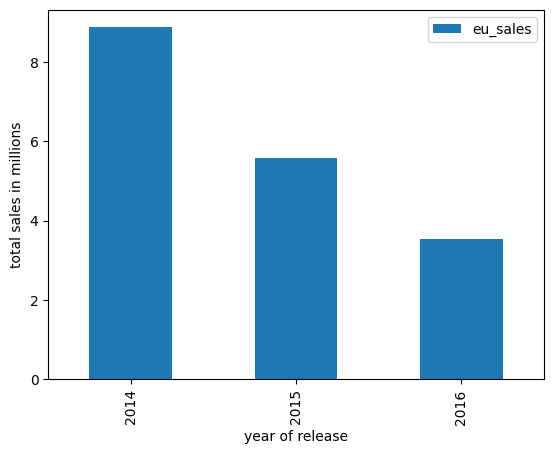

PSV


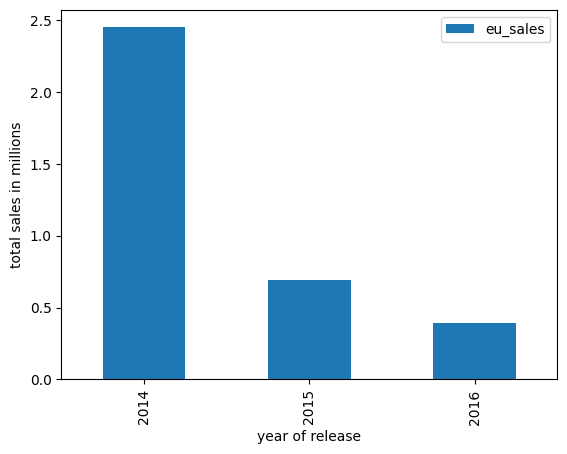

Wii


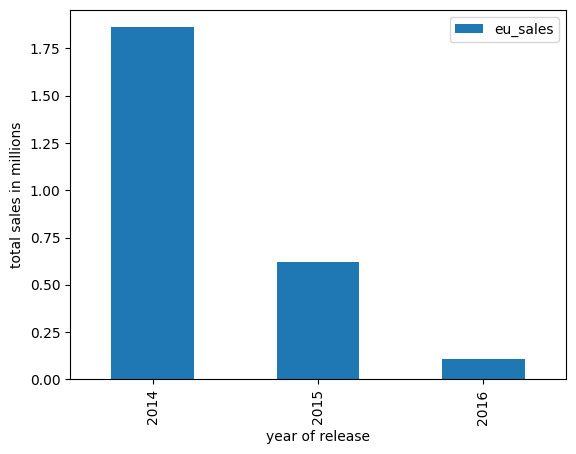

PSP


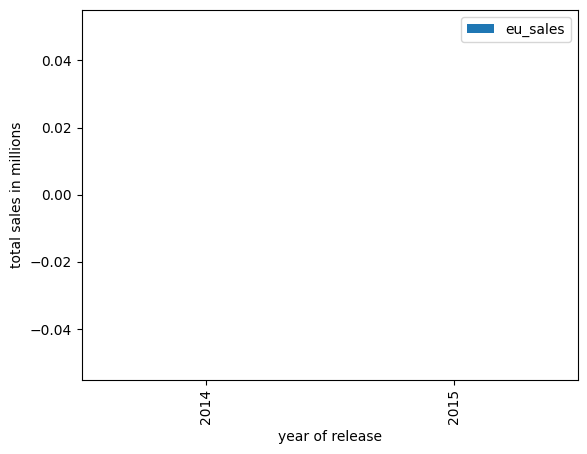

In [168]:
for platform in filtered_platform_sales.index:
    print(platform)
    (df_filtered.query('platform == @platform').pivot_table(index='year_of_release', values='eu_sales', aggfunc='sum').plot(kind='bar', xlabel='year of release', ylabel='total sales in millions'))
    plt.show()

In [169]:
df_filtered.median()

year_of_release    2015.00
na_sales              0.02
eu_sales              0.02
jp_sales              0.01
other_sales           0.01
critic_score         61.00
user_score            3.40
total_sales           0.10
dtype: float64

The PS4, XBOXONE, WiiU, PS3 and XBOX360 were the most profitable in the Europe.

PS4


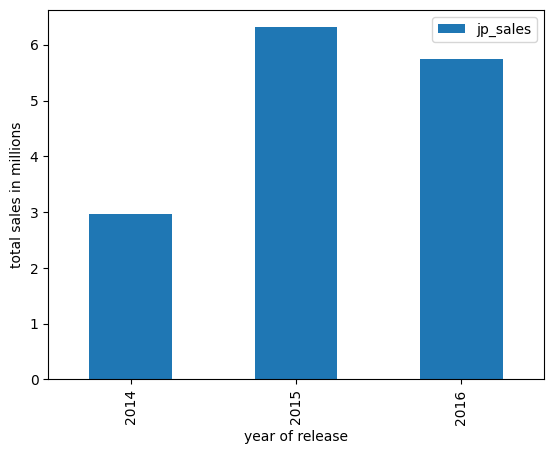

XOne


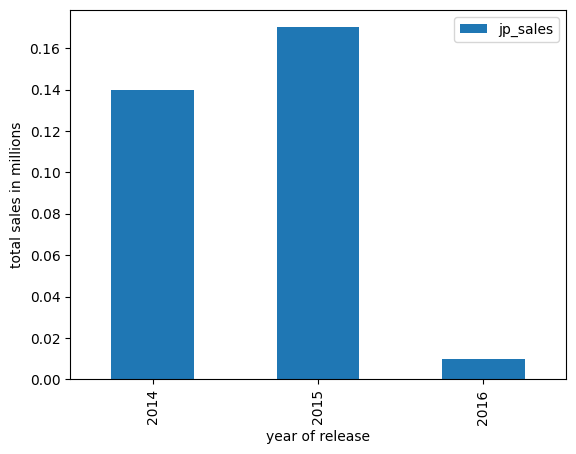

3DS


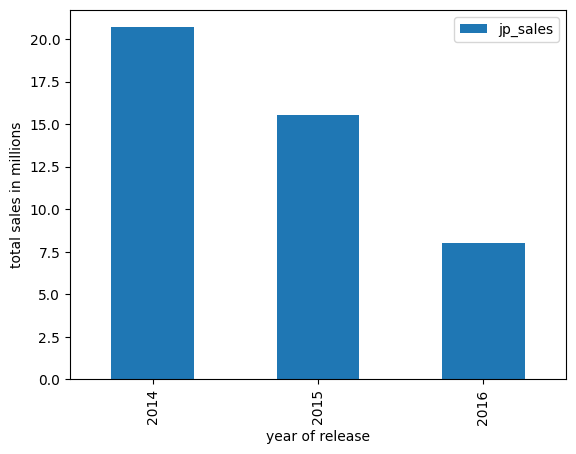

PS3


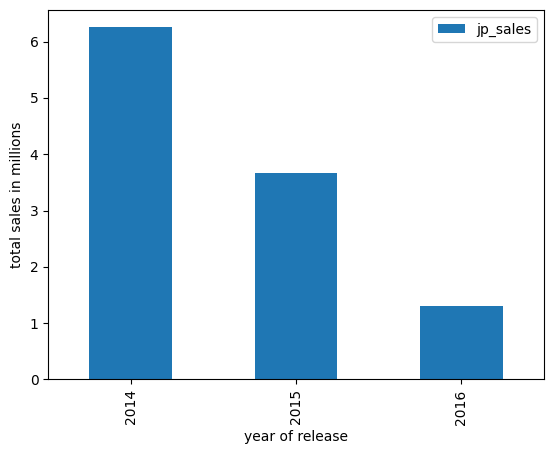

X360


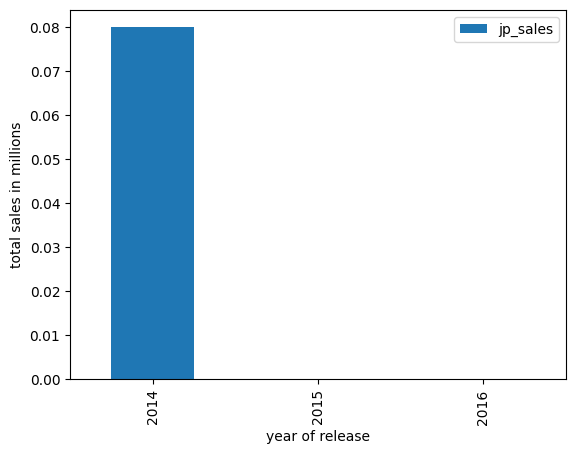

WiiU


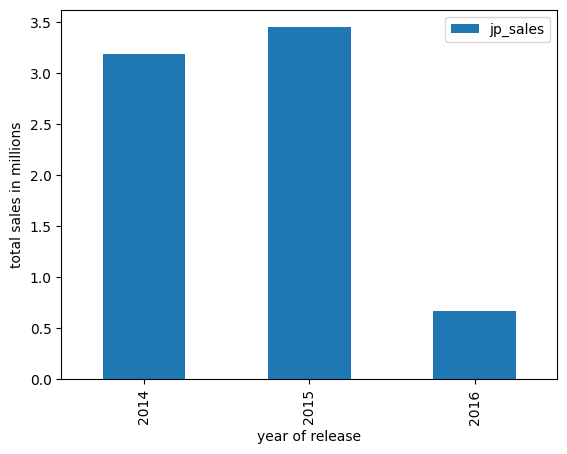

PC


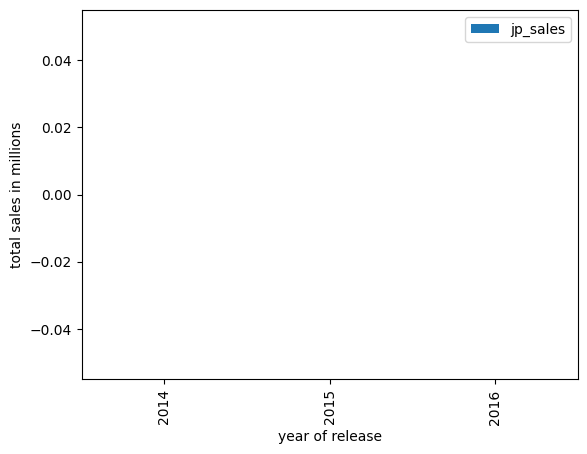

PSV


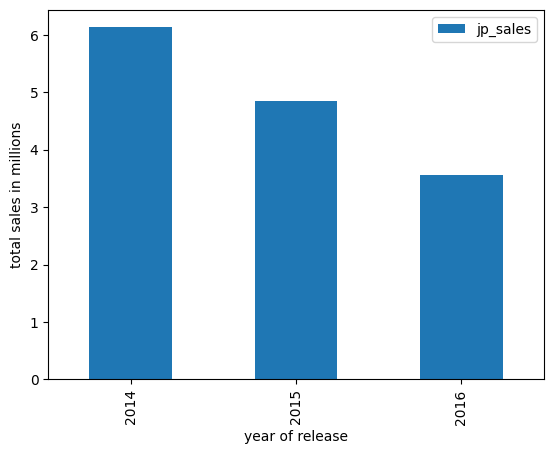

Wii


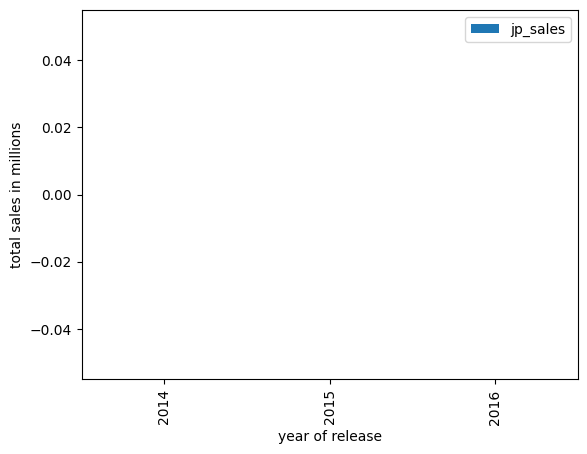

PSP


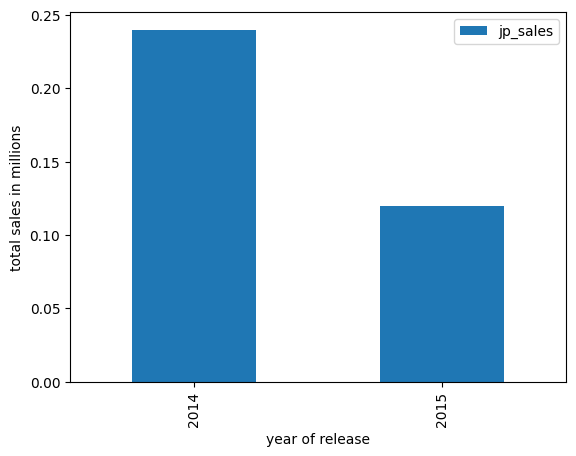

In [170]:
for platform in filtered_platform_sales.index:
    print(platform)
    (df_filtered.query('platform == @platform').pivot_table(index='year_of_release', values='jp_sales', aggfunc='sum').plot(kind='bar', xlabel='year of release', ylabel='total sales in millions'))
    plt.show()

The 3DS, XBOXONE, WIIU, PS3 and PSV were the most profitable in Japan.

#### For each region (NA, EU, JP), determine the top five genres. Explain the difference

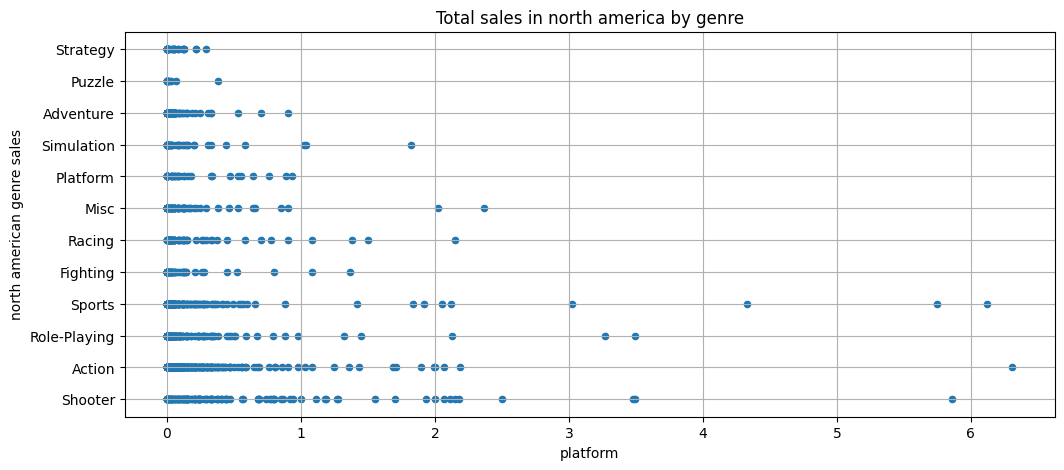

In [171]:
df_filtered.plot(kind='scatter', x='eu_sales', y='genre', xlabel='platform', ylabel='north american genre sales', grid=True, figsize=(12,5))
plt.title('Total sales in north america by genre')
plt.show()

The top 5 genres in North America were shooter, fighting, action, role-playing and sports.

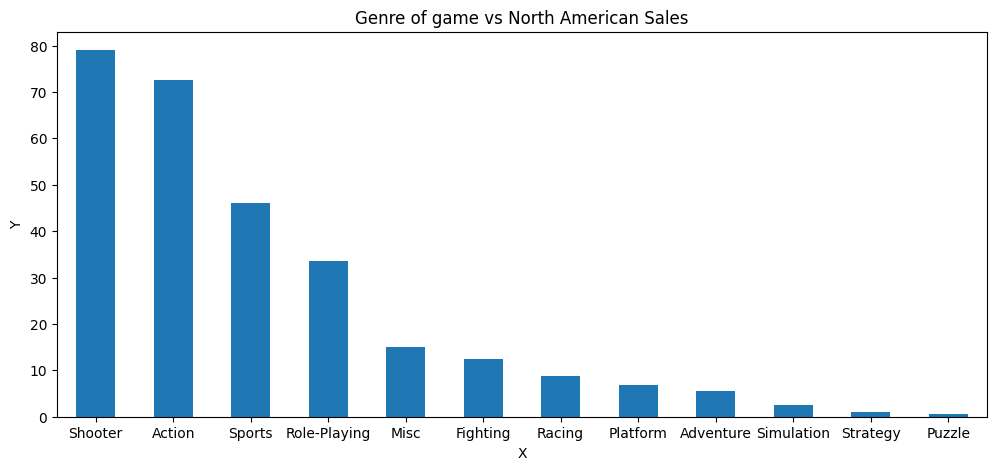

In [172]:
df_filtered.groupby('genre')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,5))

plt.title('Genre of game vs North American Sales')
plt.xlabel('X')
plt.ylabel('Y')

plt.xticks(rotation=0);

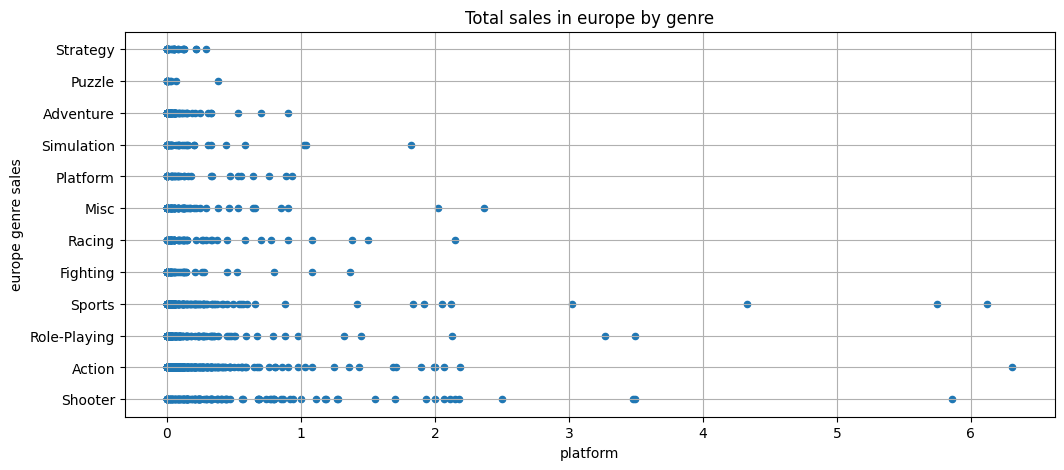

In [173]:
df_filtered.plot(kind='scatter', x='eu_sales', y='genre', xlabel='platform', ylabel='europe genre sales', grid=True, figsize=(12,5))
plt.title('Total sales in europe by genre')
plt.show()

The top 5 genres sold in europe were sports, shooter, rope-playing, action and racing.

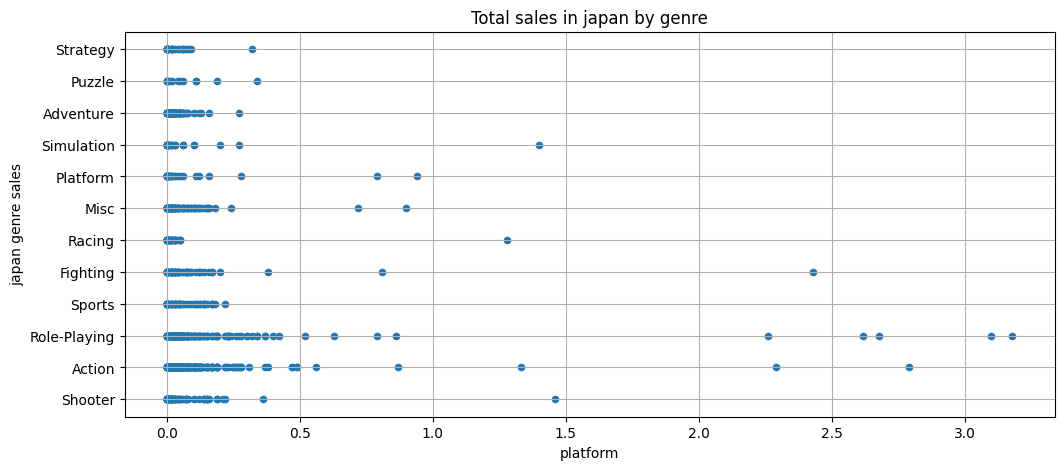

In [174]:
df_filtered.plot(kind='scatter', x='jp_sales', y='genre', xlabel='platform', ylabel='japan genre sales', grid=True, figsize=(12,5))
plt.title('Total sales in japan by genre')
plt.show()

the top 5 genres sold in japan were role-playing, action, fighting, shooter and simulation.

#### For each region (NA, EU, JP), determine do ESRB ratings affect sales in individual regions?

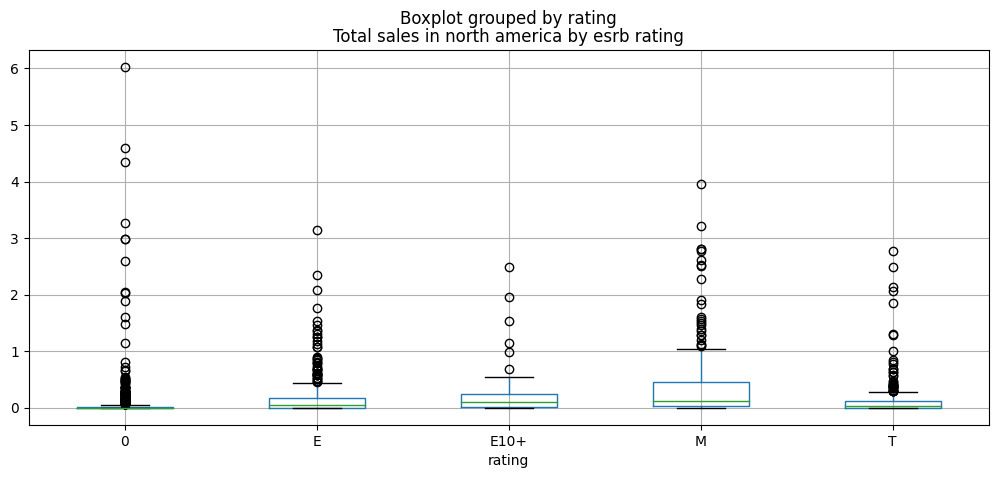

In [175]:
df_filtered.boxplot(column='na_sales', by='rating', grid=True, figsize=(12,5))
plt.title('Total sales in north america by esrb rating')
plt.ylim()
plt.xlim()
plt.show()

There doesn't seem to be a correlation with ESRB rating and sales in North America. The loose correclation exists between sales of 'mature titles' as well as 'everyone titles' and sales.

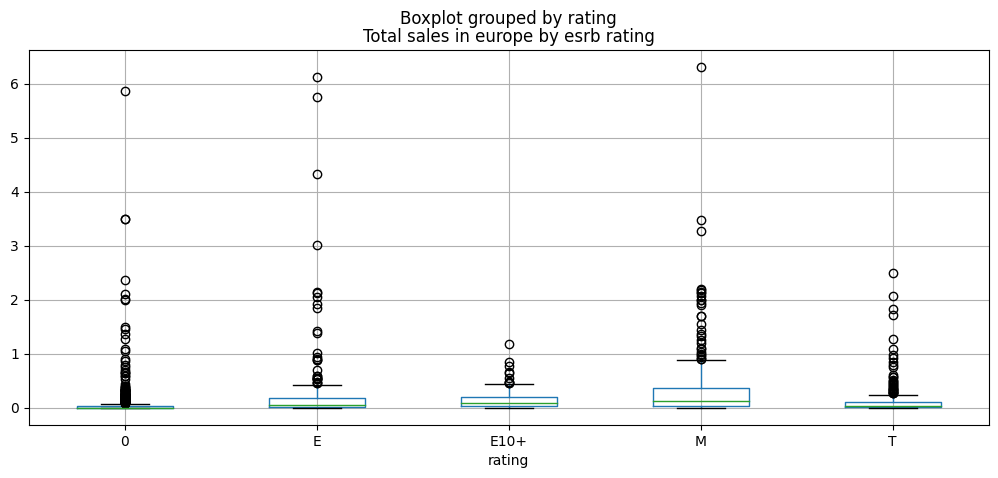

In [176]:
df_filtered.boxplot(column='eu_sales', by='rating', grid=True, figsize=(12,5))
plt.title('Total sales in europe by esrb rating')
plt.show()

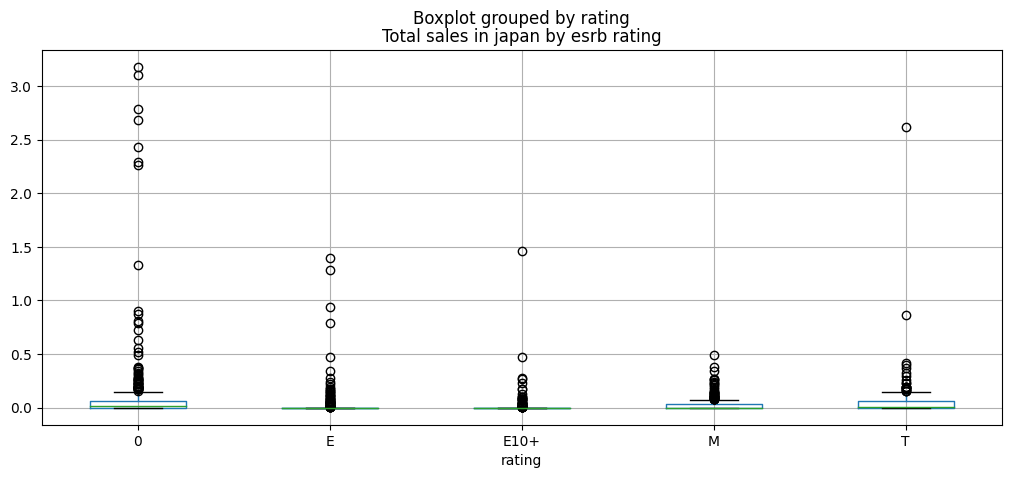

In [177]:
df_filtered.boxplot(column='jp_sales', by='rating', grid=True, figsize=(12,5))
plt.title('Total sales in japan by esrb rating')
plt.ylim()
plt.show()

There doesn't seem to be a correlation with ESRB rating and sales in Europe.

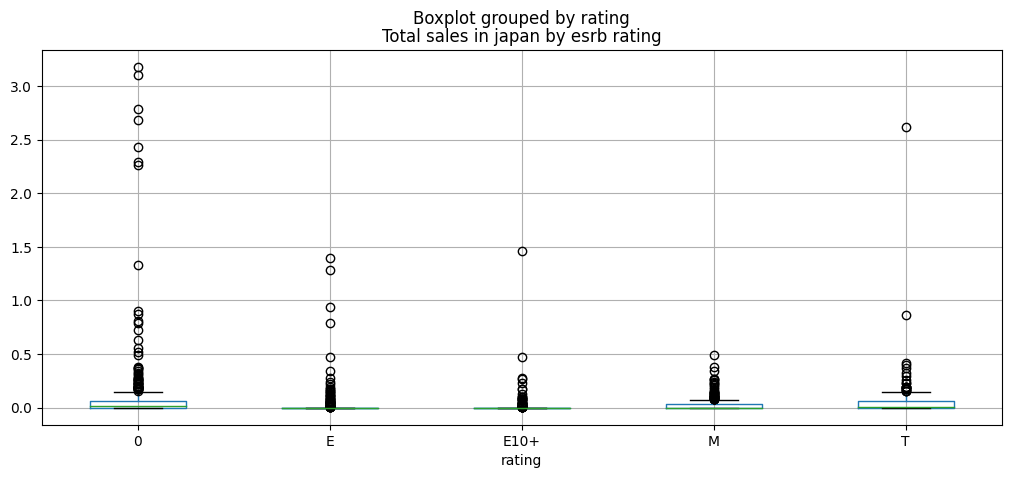

In [178]:
df_filtered.boxplot(column='jp_sales', by='rating', grid=True, figsize=(12,5))
plt.title('Total sales in japan by esrb rating')
plt.ylim()
plt.show()

H0 = There doesn't seem to be a correlation in japan between sales and esrb ratings.
H1 = There is a correlation in japan between sales and esrb ratings

We reject the null hypothesis and can conclude that H0 is correct, there doesn't seem to be a correlation in japan between sales and esrb ratings. The key difference between the regions is there are more sales in Europe and should be marketed more aggresively. Even more so, aggresively market in the North American regions over Europe and Japan.

### Step 5. Test the following hypotheses:

H0 = Average user ratings of the Xbox One and PC platforms are the same.
H1 = Average user ratings of the Xbox One and PC platforms are not the same.


We reject the null hypothesis and can conclude that H0 is correct, average user ratings of the Xbox One and PC platforms are the same.

In [179]:
xboxone = df_filtered[df_filtered['platform'] == 'PS4']['name'].unique()
xboxone = df_filtered[df_filtered['platform']=='XOne']['user_score'].dropna().astype(float)
xboxone = xboxone[xboxone != 0]
print(xboxone)

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 165, dtype: float64


In [180]:
pc = df_filtered[df_filtered['platform']=='PC']['user_score'].dropna().astype(float)
pc = pc[pc != 0]
print(pc)

458      3.9
1530     5.4
1730     7.9
2303     5.7
2784     5.9
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 122, dtype: float64


In [181]:
pvalue = stats.ttest_ind(xboxone, pc).pvalue
print(f"P-value: {pvalue}")

alpha = 0.05

P-value: 0.10450507919348415


H0 = negative, therefore we reject the null hypothesis and decidely choose to accept H1, the alternate hypothesis as correct. 

There is a significant difference between total sales and user scores of XBoxOne and PC.

In [182]:
action = df_filtered[df_filtered['genre']=='Action']['user_score'].dropna().astype(float)
action = action[action != 0]
print(action)

42       8.3
165      7.9
231      8.1
295      6.3
304      4.9
        ... 
16544    6.8
16597    6.0
16652    8.5
16660    6.7
16692    7.6
Name: user_score, Length: 297, dtype: float64


In [183]:
sports = df_filtered[df_filtered['genre']=='Sports']['user_score'].dropna().astype(float)
sports = sports[sports != 0]
print(sports)

77       4.3
94       5.0
143      5.7
264      4.5
314      6.7
        ... 
16120    6.3
16142    8.8
16146    6.9
16518    1.4
16643    6.6
Name: user_score, Length: 127, dtype: float64


In [184]:
pvalue = stats.ttest_ind(sports, action, nan_policy="omit").pvalue
print(f"P-value: {pvalue}")

alpha = 0.05

P-value: 2.8711147985105864e-19


H0 = There is no significant difference between user score and total sales of action and sports games.
H1 = There is a significant difference between user score and total sales of action and sports games.
 

We reject the H0 hypothesis and conclude there is a significant difference between user score and total sales of action and sports games.

Conclusion: we have taken the data and transformed it successfully in a visually pleasing format that is informative and answers the requests made by the preparer. We have displayed the data, cleaned the data, shown correlations between the data, visualized conclusions about the data and drawn conclusions from the hypothesis testing. We have shown that there is a significant difference between Xbox One and PC games. There is also a significant difference between user scores and total sales of action and sports games. There is no significant difference between sales in Japan and esrb ratings. We also observed the correlation between the Xbox One, PS3 and PS4 systems. We also observed the correlation between total sales and critic scores for the PS4.